In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.initializers import Initializer
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model


Using TensorFlow backend.


In [2]:
raw_data = pd.read_csv('./data/ordered_molecules.csv')

In [3]:
raw_data.head()

,time,molecule,px,py,pz,ax,ay,az
0,0,1,0.27497,0.22765,0.40548,1.185458,-1.527830,-4.614324
1,0,2,2.13410,1.61428,1.62211,-4.601109,-0.659241,1.090967
2,0,3,12.05408,12.60878,2.90295,4.530882,-2.598597,2.008448
3,0,4,0.85376,1.93829,4.87515,3.975239,0.917088,-2.261618
4,0,5,12.70257,0.12956,6.09076,-1.861295,-0.908830,5.337542


In [4]:
#raw_data_scaled = pd.DataFrame(scale(raw_data.iloc[:,2:], axis = 0))
#raw_data_scaled = pd.concat([raw_data.iloc[:,0:2].reset_index(drop=True), raw_data_scaled.reset_index(drop=True)], axis = 1)

In [5]:
#raw_data_scaled

In [6]:
def generate_data(t):
    df = raw_data.loc[raw_data['time'] == t]
    
    px_plus = df.iloc[:,2] + 12.9168567587204
    px_origin = df.iloc[:,2]
    px_minus = df.iloc[:,2] - 12.9168567587204
    
    py_plus = df.iloc[:,3] + 12.9168567587204
    py_origin = df.iloc[:,3]
    py_minus = df.iloc[:,3] - 12.9168567587204
    
    pz_plus = df.iloc[:,4] + 12.9168567587204
    pz_origin = df.iloc[:,4]
    pz_minus = df.iloc[:,4] - 12.9168567587204
    
    #plus
    data_mod_1 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_2 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_3 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_4 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_5 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_6 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_7 = pd.concat((px_plus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #minus
    data_mod_8 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_9 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_10 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_11 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_12 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_13 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_14 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    #plus + minus
    data_mod_15 = pd.concat((px_origin.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_16 = pd.concat((px_origin.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_17 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    data_mod_18 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    data_mod_19 = pd.concat((px_plus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_20 = pd.concat((px_minus.reset_index(drop=True), py_origin.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    #3
    data_mod_21 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_22 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_23 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    data_mod_24 = pd.concat((px_minus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_plus.reset_index(drop=True)), axis = 1)
    
    data_mod_25 = pd.concat((px_plus.reset_index(drop=True), py_minus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    data_mod_26 = pd.concat((px_minus.reset_index(drop=True), py_plus.reset_index(drop=True), pz_minus.reset_index(drop=True)), axis = 1)
    
    data_mod_27 = pd.concat((px_origin.reset_index(drop=True), py_origin.reset_index(drop=True), pz_origin.reset_index(drop=True)), axis = 1)
    
    combined_df = pd.concat([data_mod_27.reset_index(drop=True), data_mod_1.reset_index(drop=True), data_mod_2.reset_index(drop=True), data_mod_3.reset_index(drop=True), 
                           data_mod_4.reset_index(drop=True), data_mod_5.reset_index(drop=True), data_mod_6.reset_index(drop=True), data_mod_7.reset_index(drop=True), 
                           data_mod_8.reset_index(drop=True), data_mod_9.reset_index(drop=True), data_mod_10.reset_index(drop=True), data_mod_11.reset_index(drop=True),
                           data_mod_12.reset_index(drop=True), data_mod_13.reset_index(drop=True), data_mod_14.reset_index(drop=True), data_mod_15.reset_index(drop=True),
                           data_mod_16.reset_index(drop=True), data_mod_17.reset_index(drop=True), data_mod_18.reset_index(drop=True), data_mod_19.reset_index(drop=True),
                           data_mod_20.reset_index(drop=True), data_mod_21.reset_index(drop=True), data_mod_22.reset_index(drop=True), data_mod_23.reset_index(drop=True),
                           data_mod_24.reset_index(drop=True), data_mod_25.reset_index(drop=True), data_mod_26.reset_index(drop=True)], axis = 0, ignore_index = True)
    
    
    df_acc = pd.concat([df.iloc[:,5:].reset_index(drop=True), df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),
                        df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True),df.iloc[:,5:].reset_index(drop=True)], axis = 0, ignore_index = True)
    
    mol_num = range(1,combined_df.shape[0]+1)
    combined_df['molecule'] = mol_num
    
    result_df = pd.concat([df_acc.reset_index(drop=True), combined_df.reset_index(drop=True)], axis = 1, ignore_index = True)
    result_df.columns = ["ax", "ay", "az", "px", "py", "pz", "molecule"]
    
    result_df = result_df[["molecule", "px", "py", "pz", "ax", "ay", "az"]]
    return(result_df)

In [7]:
def find_neighbors(t):
    df_t = generate_data(t)
    
    k = 11
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(df_t)
    distances, indices = nbrs.kneighbors(df_t)
    return(k, df_t, indices[0:128])

In [8]:
def make_df(t):
    t_plus_1_df = raw_data.loc[raw_data['time']==t+1]
    t_plus_1_values = t_plus_1_df.iloc[:,2:8]
    
    li = []
    k, df, idx = find_neighbors(t)
    for i in range(0,idx.shape[0]):
        rows = []
        for j in range(0,k):
            row = df.loc[df['molecule'] == (idx[i][j]+1)]
            row_cut = np.asarray(row.iloc[:,1:])
            rows.append(row_cut)
        
        li.append(np.array(rows).ravel())
        
    res = pd.DataFrame(li)
    df_made = pd.concat([res.reset_index(drop=True), t_plus_1_values.reset_index(drop=True)], axis = 1)
    return(df_made)

In [9]:
#make whole dataset
final_data = make_df(0)

for t in range(1,1999):
    df_part = make_df(t)
    final_data = pd.concat([final_data.reset_index(drop=True), df_part.reset_index(drop=True)], axis = 0, ignore_index=True)

In [11]:
final_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,px,py,pz,ax,ay,az
255867,10.61893,9.19931,8.07314,-1.117306,3.729599,-1.309010,9.50165,10.43202,10.00620,1.619934,...,12.44195,-1.383609,0.276540,2.313305,10.61230,9.20293,8.07598,-1.025038,3.645025,-1.280867
255868,12.28521,7.63572,8.67506,3.562240,-3.790684,-2.208148,9.50165,10.43202,10.00620,1.619934,...,9.91396,2.201449,2.367211,0.584105,12.28148,7.63805,8.68123,3.634594,-3.766582,-2.338953
255869,6.03319,12.80925,6.04868,1.966739,5.790018,5.545910,10.61893,9.19931,8.07314,-1.117306,...,6.15176,-1.804349,-3.720656,1.763077,6.03300,12.81292,6.05135,2.307742,5.650190,5.404642
255870,9.50165,10.43202,10.00620,1.619934,-1.090169,-0.924991,12.00595,11.18273,11.89492,-0.597181,...,1.52168,4.483155,-2.743785,2.235428,9.50306,10.44102,9.99912,1.395564,-1.232665,-0.779073
255871,12.00595,11.18273,11.89492,-0.597181,-1.916267,0.042068,9.50165,10.43202,10.00620,1.619934,...,11.79126,4.643813,-2.566127,2.290828,12.01283,11.18948,11.90577,-0.730089,-1.992210,-0.056095


In [12]:
##########################################################
################# save dataframe #########################
final_data.to_csv('./data/KNN_10_expand.csv', index = False)

In [17]:
final_data = pd.read_csv('./data/KNN_10_expand.csv')

In [18]:
final_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,px,py,pz,ax,ay,az
255867,10.61893,9.19931,8.07314,-1.117306,3.729599,-1.309010,9.50165,10.43202,10.00620,1.619934,...,12.44195,-1.383609,0.276540,2.313305,10.61230,9.20293,8.07598,-1.025038,3.645025,-1.280867
255868,12.28521,7.63572,8.67506,3.562240,-3.790684,-2.208148,9.50165,10.43202,10.00620,1.619934,...,9.91396,2.201449,2.367211,0.584105,12.28148,7.63805,8.68123,3.634594,-3.766582,-2.338953
255869,6.03319,12.80925,6.04868,1.966739,5.790018,5.545910,10.61893,9.19931,8.07314,-1.117306,...,6.15176,-1.804349,-3.720656,1.763077,6.03300,12.81292,6.05135,2.307742,5.650190,5.404642
255870,9.50165,10.43202,10.00620,1.619934,-1.090169,-0.924991,12.00595,11.18273,11.89492,-0.597181,...,1.52168,4.483155,-2.743785,2.235428,9.50306,10.44102,9.99912,1.395564,-1.232665,-0.779073
255871,12.00595,11.18273,11.89492,-0.597181,-1.916267,0.042068,9.50165,10.43202,10.00620,1.619934,...,11.79126,4.643813,-2.566127,2.290828,12.01283,11.18948,11.90577,-0.730089,-1.992210,-0.056095


In [19]:
diff_x = final_data.iloc[:,66] - final_data.iloc[:,0]
diff_y = final_data.iloc[:,67] - final_data.iloc[:,1]
diff_z = final_data.iloc[:,68] - final_data.iloc[:,2]


diff_x_idx, = np.where(abs(diff_x) > 3)
diff_y_idx, = np.where(abs(diff_y) > 3)
diff_z_idx, = np.where(abs(diff_z) > 3)

diff_idx = set(diff_x_idx) | set(diff_y_idx) | set(diff_z_idx)

final_data = final_data.loc[final_data.index.drop(list(diff_idx))]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(final_data.iloc[:,0:66], 
                                                    final_data.iloc[:,66:],
                                                    test_size = 0.3, random_state = 10)

In [21]:
#model 1
model_1 = Sequential()

model_1.add(Dense(32, input_dim=66, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(32, activation='relu', kernel_initializer = 'he_normal', kernel_regularizer = regularizers.l2(0.01)))
model_1.add(BatchNormalization())

model_1.add(Dense(6, activation='linear', kernel_initializer = 'glorot_normal', kernel_regularizer = regularizers.l2(0.01)))

In [22]:
model_1.compile(loss='mean_absolute_error', optimizer= 'rmsprop', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
model_check_point = ModelCheckpoint('./model/KNN_10_expand.h5', monitor = 'val_loss', verbose=2, save_best_only=True)

callback_list = [model_check_point, early_stop]

In [23]:
hist_1 = model_1.fit(x_train.values, y_train.values, epochs=150, batch_size=64, validation_data=(x_test, y_test), callbacks = callback_list)

Train on 178881 samples, validate on 76664 samples
Epoch 1/150
178881/178881 [==============================] - 10s 55us/step - loss: 1.3023 - mean_absolute_error: 0.8653 - val_loss: 0.5731 - val_mean_absolute_error: 0.3708

Epoch 00001: val_loss improved from inf to 0.57311, saving model to ./model/KNN_10_expand.h5
Epoch 2/150
178881/178881 [==============================] - 9s 49us/step - loss: 0.6261 - mean_absolute_error: 0.4640 - val_loss: 0.4329 - val_mean_absolute_error: 0.2953

Epoch 00002: val_loss improved from 0.57311 to 0.43291, saving model to ./model/KNN_10_expand.h5
Epoch 3/150
178881/178881 [==============================] - 9s 49us/step - loss: 0.5734 - mean_absolute_error: 0.4513 - val_loss: 0.5005 - val_mean_absolute_error: 0.3896

Epoch 00003: val_loss did not improve from 0.43291
Epoch 4/150
178881/178881 [==============================] - 9s 48us/step - loss: 0.5406 - mean_absolute_error: 0.4387 - val_loss: 0.3858 - val_mean_absolute_error: 0.2909

Epoch 00004: va

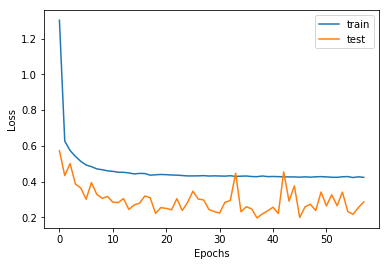

In [24]:
# plot history
plt.plot(hist_1.history['loss'], label='train')
plt.plot(hist_1.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model = load_model('./model/KNN_10_expand.h5')

In [26]:
y_pred = pd.DataFrame(model.predict(x_test))

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_metric = mean_absolute_error(y_test, y_pred)
r2_error = r2_score(y_test.values, y_pred)

In [28]:
print("MSE:", mse)
print("RMSE: ", rmse)
print("MAE: ", mae_metric)
print("R2_Score:", r2_error)

MSE: 0.0399762868034916
RMSE:  0.19994070821994103
MAE:  0.15668841440053188
R2_Score: 0.996060121972067


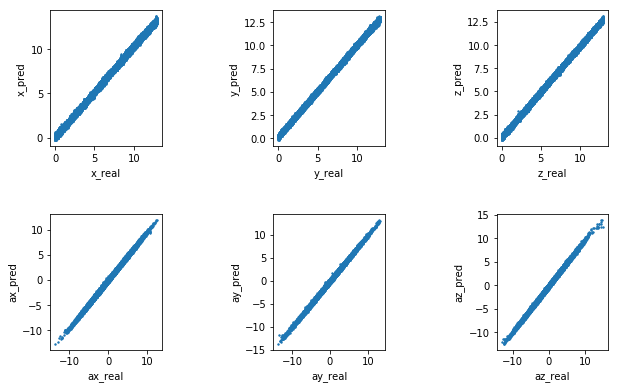

In [29]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.scatter(y_test.values[:,0], y_pred.iloc[:,0], s= 2)
ax1.set_xlabel('x_real')
ax1.set_ylabel('x_pred')
#ax1.set_xlim((-2.5, 2.5))
#ax1.set_ylim((-2.5, 2.5))
ax2.scatter(y_test.values[:,1], y_pred.iloc[:,1], s= 2)
ax2.set_xlabel('y_real')
ax2.set_ylabel('y_pred')
#ax2.set_xlim((-2.5, 2.5))
#ax2.set_ylim((-2.5, 2.5))
ax3.scatter(y_test.values[:,2], y_pred.iloc[:,2], s= 2)
ax3.set_xlabel('z_real')
ax3.set_ylabel('z_pred')
#ax3.set_xlim((-2.5, 2.5))
#ax3.set_ylim((-2.5, 2.5))
ax4.scatter(y_test.values[:,3], y_pred.iloc[:,3], s= 2)
ax4.set_xlabel('ax_real')
ax4.set_ylabel('ax_pred')
#ax4.set_xlim((-2.5, 2.5))
#ax4.set_ylim((-2.5, 2.5))
ax5.scatter(y_test.values[:,4], y_pred.iloc[:,4], s= 2)
ax5.set_xlabel('ay_real')
ax5.set_ylabel('ay_pred')
#ax5.set_xlim((-2.5, 2.5))
#ax5.set_ylim((-2.5, 2.5))
ax6.scatter(y_test.values[:,5], y_pred.iloc[:,5], s= 2)
ax6.set_xlabel('az_real')
ax6.set_ylabel('az_pred')
#ax6.set_xlim((-2.5, 2.5))
#ax6.set_ylim((-2.5, 2.5))

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()

In [30]:
#cross validation

kfold = KFold(n_splits=20, shuffle=True, random_state = 500)
data = final_data
X = final_data.iloc[:,0:66]
Y = final_data.iloc[:,66:]

cv_rmse = []
cv_mae = []
cv_r2 = []

for train, test in kfold.split(X, Y):
    
    # evaluate the model
    pred = model.predict(X.iloc[test,:])
    
    rmse = np.sqrt(mean_squared_error(Y.iloc[test,:], pred))
    mae = mean_absolute_error(Y.iloc[test,:], pred)
    r2 = r2_score(Y.iloc[test,:], pred)
    
    cv_rmse.append(rmse)
    cv_mae.append(mae)
    cv_r2.append(r2)

In [31]:
print(np.mean(cv_rmse))
print(np.std(cv_rmse))
print('\n')

print(np.mean(cv_mae))
print(np.std(cv_mae))
print('\n')

print(np.mean(cv_r2))
print(np.std(cv_r2))

0.200246644210968
0.0006257128417490667


0.156818512685712
0.00045979629002445617


0.9960511381099503
3.455787222595099e-05
